In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

Гистограммы относительной и
фактической частоты встречаемости для 20 наиболее популярных
товаров

In [ ]:
df.stack().value_counts().head(20)

,count
mineral water,1787
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230
green tea,990
milk,972
ground beef,737
frozen vegetables,715
pancakes,713


In [ ]:
df.stack().value_counts(normalize=True).head(20)

,proportion
mineral water,0.060900
eggs,0.045939
spaghetti,0.044508
french fries,0.043690
chocolate,0.041918
green tea,0.033739
milk,0.033125
ground beef,0.025117
frozen vegetables,0.024367
pancakes,0.024299


<Axes: >

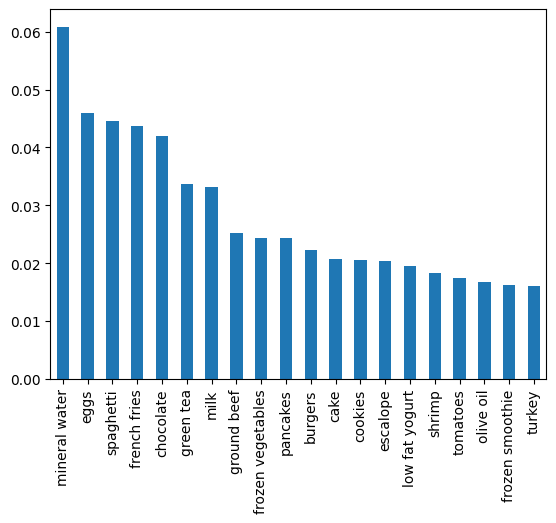

In [ ]:
# относительная
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

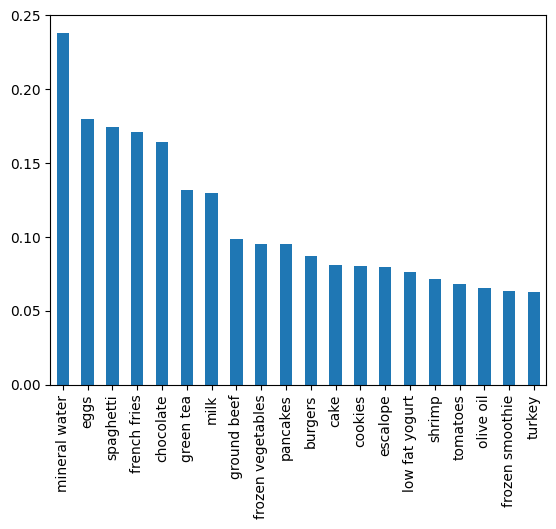

In [ ]:
# фактическая
df.stack().value_counts().head(20).apply(lambda item: item/df.shape[0]).plot(kind='bar')

Применение алгоритма apriori с использованием трёх библиотек
(apriori_python, apyori, efficient_apriori). Подбор гиперпараметров для вывода топ 10 пар

In [ ]:
# преобразование датасета в фомат списка транзакций (списка списков)
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
transactions[0]

['burgers', 'meatballs', 'eggs']

In [ ]:
# замер времени
import time
times = []

# support - frequency, at which items are bought. rulling out items that are not bought frequently
# confidence - how often items occur together
# lift - the accurance of randomness. насколько лучше по сравнению с чистой случайностью

In [ ]:
# apriori_python
from apriori_python import apriori

start = time.perf_counter()
t1, rules = apriori(transactions, minSup=0.04, minConf=0.17)
time1 = (time.perf_counter() - start)
times.append(time1)

In [ ]:
rules

[[{'mineral water'}, {'ground beef'}, 0.17179630665920537],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [ ]:
len(rules)

10

In [ ]:
# apyori
from apyori import apriori

start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support = 0.04,
                min_confidence = 0.17,
                min_lift = 1.0001)
results = list(rules)
time2 = (time.perf_counter() - start)
times.append(time2)

In [ ]:
for result in results:
  for subset in result[2]:
    print(subset[0], subset[1])
    print('support: {0}, conf: {1}, lift: {2}'.format(result[1], subset[2], subset[3]))
    print()

frozenset({'chocolate'}) frozenset({'mineral water'})
support: 0.05266666666666667, conf: 0.32139951179820997, lift: 1.3489067367020564

frozenset({'mineral water'}) frozenset({'chocolate'})
support: 0.05266666666666667, conf: 0.22104085058757697, lift: 1.3489067367020564

frozenset({'eggs'}) frozenset({'mineral water'})
support: 0.05093333333333333, conf: 0.28338278931750743, lift: 1.1893513821383916

frozenset({'mineral water'}) frozenset({'eggs'})
support: 0.05093333333333333, conf: 0.21376608841634023, lift: 1.1893513821383916

frozenset({'ground beef'}) frozenset({'mineral water'})
support: 0.040933333333333335, conf: 0.41655359565807326, lift: 1.7482663499919135

frozenset({'mineral water'}) frozenset({'ground beef'})
support: 0.040933333333333335, conf: 0.1717963066592054, lift: 1.7482663499919138

frozenset({'milk'}) frozenset({'mineral water'})
support: 0.048, conf: 0.3703703703703704, lift: 1.5544363613753656

frozenset({'mineral water'}) frozenset({'milk'})
support: 0.048, c

In [ ]:
# efficient_apriori

from efficient_apriori import apriori

start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.04, min_confidence=0.17)
time3 = (time.perf_counter()-start)
times.append(time3)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


Применение алгоритма FP-Growth из библиотеки fpgrowth_py.

https://loginom.ru/blog/fpg

In [ ]:
from fpgrowth_py import fpgrowth

start - time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.17)
time4 = (time.perf_counter()-start)
times.append(time4)

In [ ]:
for i in range(len(rules)):
  print(rules[i])

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]


Сравнение времени выполнения всех алгоритмов на данном датасете


<BarContainer object of 4 artists>

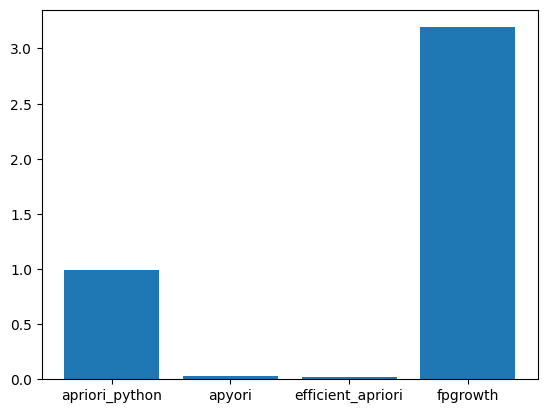

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth'], times)